<a href="https://colab.research.google.com/github/rubuntu/uaa-417-sistemas-de-gestion-de-bases-de-datos-avanzados/blob/main/ML01_Intro_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Introducci√≥n al Aprendizaje Autom√°tico (Machine Learning)

¬øQu√© significa aprender? Aprender es un proceso donde tomamos una serie de observaciones y
sacamos conclusiones basadas en experiencias pasadas. Por ejemplo, podemos aprender a reconocer
patrones en datos de experiencia, como: cuando tomo el autob√∫s m√°s tarde, llego tarde al trabajo.
El Aprendizaje Autom√°tico (Machine Learning) ocurre cuando ense√±amos a una computadora a hacer lo
mismo: encontrar patrones en los datos. La idea es que los humanos son muy buenos para encontrar
patrones, pero relativamente lentos al revisar grandes cantidades de datos. Las computadoras
necesitan ser entrenadas para encontrar los patrones, pero pueden procesar datos (archivos CSV,
im√°genes, etc.) incre√≠blemente r√°pido.

La revoluci√≥n del Machine Learning tiene sus ra√≠ces en dos factores principales:

1. Una enorme cantidad de datos recientemente generados
2. Una gran mejora en la memoria y el rendimiento de las computadoras

Si queremos aprovechar el aprendizaje autom√°tico, necesitamos aprender a ense√±ar a las computadoras
a reconocer patrones y aprovechar esa habilidad para resolver problemas del mundo real. Empecemos
con un ejemplo muy simple.

Supongamos que tenemos datos unidimensionales dados por una sola caracter√≠stica X y un conjunto
correspondiente de etiquetas y. Queremos modelar estos datos, as√≠ que crearemos una relaci√≥n
f(X) ‚âà y. Esta funci√≥n f representar√° nuestro modelo. Generaremos los datos eligiendo aleatoriamente
un exponente para una tendencia y agregando algo de ruido aleatorio. Creamos los datos y vemos c√≥mo se ve.

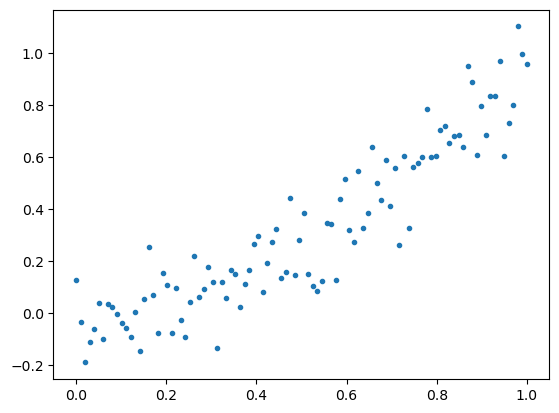

In [ ]:
X = np.linspace(0, 1, 100)
exp = np.random.choice([2, 3])
y = X**exp + np.random.randn(X.shape[0])/10
plt.plot(X, y, '.')


Ahora generaremos la relaci√≥n predictiva usando uno de los m√©todos m√°s simples: ajustar una recta
a los datos.

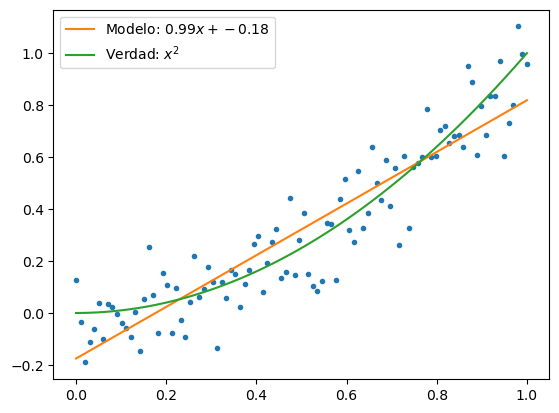

In [ ]:
p = np.polyfit(X, y, 1)
z = np.poly1d(p)
plt.plot(X, y, '.')
plt.plot(X, z(X), label=r"Modelo: ${:.2f}x + {:.2f}$".format(*p))
plt.plot(X, X**exp, label=r'Verdad: $x^{}$'.format(exp))
plt.legend()


Ahora tenemos un modelo para estos datos, aprendido por la computadora: dado un valor (o varios)
de X podemos predecir la salida. En el contexto de Machine Learning, esto se llama Regresi√≥n
Lineal y es un m√©todo bastante potente y general para aprender. Solo este ejemplo abre muchas
preguntas que responderemos m√°s adelante:

1. ¬øQu√© tan bueno es el modelo?
2. ¬øPodemos a√±adir flexibilidad al modelo?
3. ¬øEl modelo generaliza?
4. ¬øQu√© nos ense√±a este modelo sobre los datos?

Empecemos con la pregunta 4, que en muchos sentidos es la m√°s importante. Para este modelo simple
podemos ver que el vector de etiquetas y tiene una correlaci√≥n positiva con las caracter√≠sticas X.

Normalmente, el objetivo del aprendizaje autom√°tico es doble:

1. Entender los datos que ya tenemos
2. Usar ese entendimiento para hacer predicciones sobre datos sin etiquetar

El aprendizaje autom√°tico cae en dos clases: **supervisado** y **no supervisado**. En aprendizaje
supervisado intentamos aprender una relaci√≥n predictiva entre **caracter√≠sticas** de nuestros datos
y alguna etiqueta de salida. En aprendizaje no supervisado queremos encontrar tendencias en nuestras
caracter√≠sticas sin usar etiquetas objetivo. El aprendizaje no supervisado suele apoyarse en reducir
la dimensionalidad de los datos.

Un ejemplo humano de aprendizaje supervisado ser√≠a tomar prestados libros de una biblioteca sobre
matem√°ticas y geograf√≠a. Al leer diferentes libros de cada tema, aprendemos qu√© s√≠mbolos, im√°genes
y palabras se asocian con matem√°ticas y cu√°les con geograf√≠a. Una tarea no supervisada similar
ser√≠a tomar prestados muchos libros sin conocer su tema. Podemos ver que algunos libros contienen
im√°genes similares (mapas) y otros contienen s√≠mbolos similares (por ejemplo, las letras griegas Œ£
y œÄ). Decimos que los libros que contienen mapas son similares y que son diferentes de los que
contienen letras griegas. Crucialmente, _no sabemos de qu√© tratan los libros, solo que son
similares o diferentes_.

Primero hablemos de aprendizaje supervisado, ya que ah√≠ pasaremos la mayor parte del tiempo.

Formalmente, el problema de aprendizaje supervisado puede plantearse as√≠: dada una matriz X de
dimensiones n √ó p, crear una relaci√≥n predictiva (o funci√≥n) f(X) donde f(X) ‚âà y, siendo y un
vector de dimensi√≥n n. A X se le llama **matriz de caracter√≠sticas** y a y **etiquetas**.

El objetivo general del aprendizaje supervisado es aplicar luego este modelo a datos sin etiquetar
para los que podamos construir una matriz de caracter√≠sticas representativa de la original. ¬°Esto
nos permite hacer predicciones!

Por supuesto, el aprendizaje autom√°tico es solo una herramienta que debe aplicarse con cuidado y
reflexi√≥n. No es la soluci√≥n ideal para cada problema. Veamos algunos de los inconvenientes que
podr√≠amos encontrar.

# Dificultades del Aprendizaje Autom√°tico

Los modelos pueden estar fuertemente sesgados y, por lo tanto, no ser lo suficientemente flexibles
para manejar la generalizaci√≥n. Grafiquemos nuestra funci√≥n original en un rango m√°s amplio y usemos
el modelo anterior.

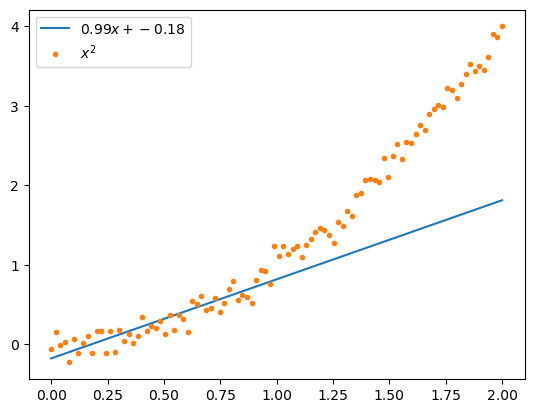

In [ ]:
X = np.linspace(0, 2, 100)
y = X**exp + np.random.randn(X.shape[0])/10
plt.plot(X, z(X), label=r"${:.2f}x + {:.2f}$".format(*p))
plt.plot(X, y,'.', label=r'$x^{}$'.format(exp))
plt.legend()


El modelo funciona bastante bien en el rango sobre el cual inicialmente consideramos nuestros datos,
pero podemos ver que no generalizar√° bien a caracter√≠sticas fuera del rango que consideramos. Este
es un problema general; debemos asegurarnos de que nuestros datos de entrenamiento contengan una
distribuci√≥n bien muestreada sobre la cual esperamos hacer predicciones (o tener alg√∫n conocimiento
previo que nos diga que podemos extrapolar m√°s all√° del dominio de nuestros datos de entrenamiento).
El aprendizaje autom√°tico encuentra patrones en los datos que ya ha visto y no siempre puede hacer
buenas predicciones en datos que no ha visto.

Intentemos arreglar esto a√±adiendo m√°s par√°metros al modelo.

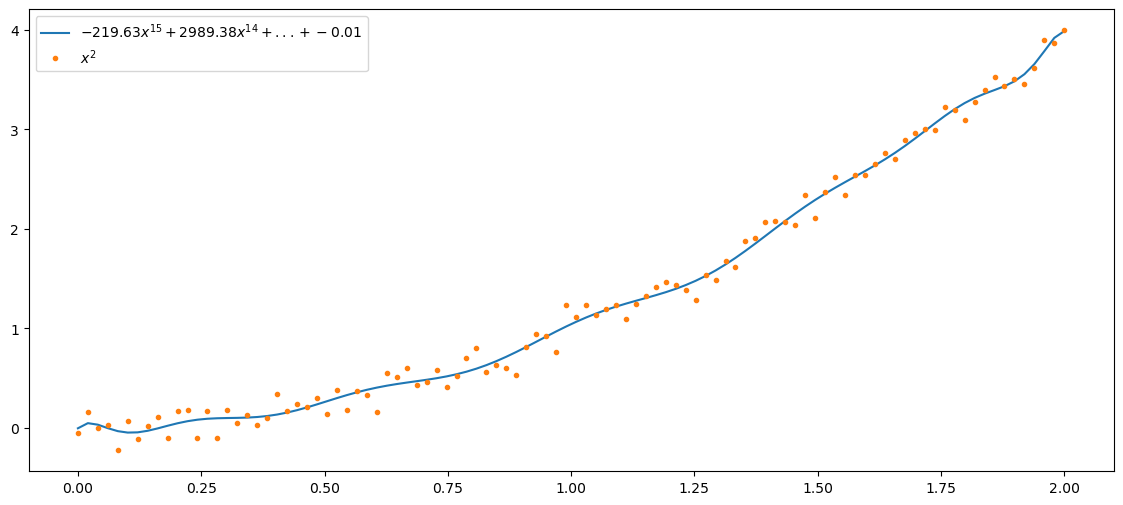

In [ ]:
p = np.polyfit(X, y, 15)
z = np.poly1d(p)
plt.figure(figsize=[14, 6])
plt.plot(X, z(X), label=r"${:.2f}x^{{15}} + {:.2f}x^{{14}} + ... + {:.2f}$".format(*p[[0, 1, -1]]))
plt.plot(X, y,'.', label=r'$x^{}$'.format(exp))
plt.legend()


¬°Vaya, parece un ajuste perfecto! ¬øDemasiado bueno? Parece que el modelo est√° ajustando peque√±as
ondulaciones en los datos que sabemos que no son reales (los datos reales se derivan de un exponente
simple). Intentemos generalizar de nuevo.

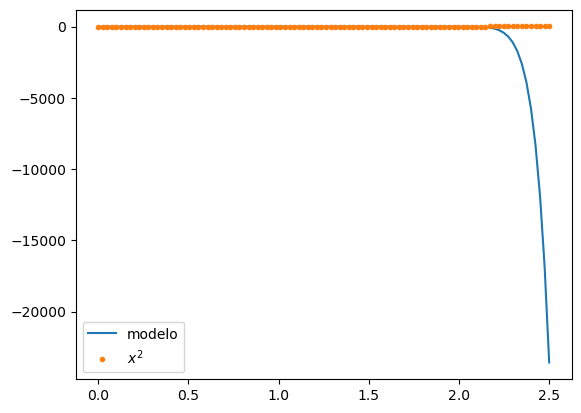

In [ ]:
X = np.linspace(0, 2.5, 100)
y = X**exp + np.random.randn(X.shape[0])/10
plt.plot(X, z(X), label=r"modelo")
plt.plot(X, y,'.', label=r'$x^{}$'.format(exp))
plt.legend()


¬°Otra vez vaya! Eso es bastante malo. Este es un ejemplo de **sobreajuste** (overfitting), donde
hemos permitido demasiada flexibilidad al modelo y este ha ajustado el ruido en los datos, lo cual
no es generalizable.

Aprenderemos m√°s sobre c√≥mo combatir estos problemas, pero la idea es que debemos tener cuidado al
elegir el modelo que queremos usar y los **hiperpar√°metros** (en este caso, el orden del polinomio)
para dicho modelo.

# Scikit-Learn

Para realizar aprendizaje autom√°tico usaremos el paquete `scikit-learn`, que ofrece una interfaz
unificada basada en clases para diferentes modelos y utilidades de aprendizaje autom√°tico.
`Scikit-learn` se basa en la idea de una clase `Estimator` que implementa los m√©todos necesarios
para el aprendizaje autom√°tico.

Cada objeto estimador implementar√° un m√©todo `fit` que acepta como argumentos una matriz de
caracter√≠sticas `X` y un vector de etiquetas `y`, as√≠ como un m√©todo `predict` que acepta como
argumento una matriz de caracter√≠sticas `X`. Veamos un ejemplo.

Primero debemos importar el estimador que queremos, en este caso `LinearRegression` (solo debemos
hacerlo una vez por espacio de nombres; es simplemente una clase de Python).

In [ ]:
from sklearn.linear_model import LinearRegression


Ahora podemos instanciar esta clase y pasar cualquier hiperpar√°metro en la creaci√≥n.

In [ ]:
lr = LinearRegression(fit_intercept=True)
lr

LinearRegression()

El hiperpar√°metro **`fit_intercept=True`** en `LinearRegression` controla si el modelo debe **ajustar un t√©rmino de intercepto (tambi√©n llamado ‚Äúsesgo‚Äù o ‚Äúbias‚Äù)** al entrenar.

---

### üìå En detalle:

* **Si `fit_intercept=True` (por defecto):**
  El modelo estima no solo los coeficientes de las variables (`Œ≤‚ÇÅ, Œ≤‚ÇÇ, ‚Ä¶`), sino tambi√©n un t√©rmino adicional `Œ≤‚ÇÄ` (intercepto).
  La ecuaci√≥n queda as√≠:

  $$
  y = Œ≤_0 + Œ≤_1 x_1 + Œ≤_2 x_2 + \dots + Œ≤_n x_n
  $$

  Esto permite que la recta o hiperplano **no est√© forzado a pasar por el origen (0,0,‚Ä¶)**, sino que se ajuste mejor a los datos.

---

* **Si `fit_intercept=False`:**
  El modelo **no incluye el intercepto**, por lo que se asume que los datos ya est√°n centrados.
  La ecuaci√≥n se reduce a:

  $$
  y = Œ≤_1 x_1 + Œ≤_2 x_2 + \dots + Œ≤_n x_n
  $$

  Esto obliga a que la regresi√≥n pase por el origen. Puede ser √∫til si ya has **preprocesado tus datos** (por ejemplo, restando la media de cada variable, o si sabes que el valor real en `x=0` debe dar `y=0`).

---

üëâ En la pr√°ctica, casi siempre se usa **`fit_intercept=True`**, salvo que los datos est√©n **ya normalizados/centrados** o que sepas de antemano que el modelo debe pasar por el origen.



Ahora podemos usar este objeto para ajustar nuestros datos anteriores. Usaremos el m√©todo `fit`
para hacerlo. Necesitaremos cambiar la forma del vector `X` para que sea una matriz de
caracter√≠sticas de una sola columna en lugar de un vector unidimensional.

In [ ]:
lr.fit(X.reshape(-1, 1), y)

LinearRegression()


El m√©todo `fit` realizar√° el ajuste y guardar√° los par√°metros ajustados dentro del estado del objeto.
Podemos verlos si queremos.

In [ ]:
lr.coef_, lr.intercept_

(array([2.48854325]), -1.0177669916343706)


Guardar los par√°metros dentro de la instancia es extremadamente √∫til, ya que nos permite serializar
(pickle) todo el objeto y conservar los par√°metros dentro del propio modelo.

Por √∫ltimo, podemos usar el m√©todo `predict` para hacer predicciones.

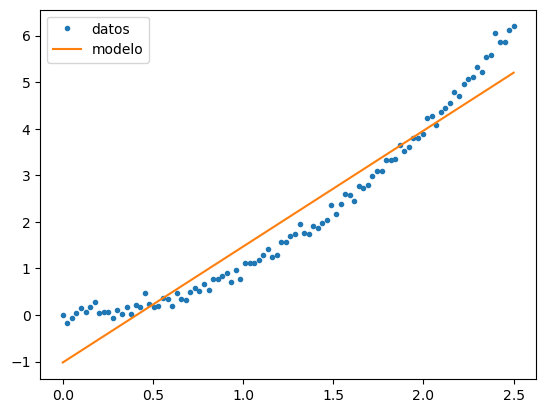

In [ ]:
predictions = lr.predict(X.reshape(-1, 1))
plt.plot(X, y, '.', label='datos')
plt.plot(X, predictions, label='modelo')
plt.legend()


Exploraremos los modelos lineales en m√°s detalle en otra lecci√≥n, pero si queremos mejorar este
modelo, necesitaremos dise√±ar mejores caracter√≠sticas. Para asomarnos a d√≥nde vamos, usemos m√°s
herramientas de `scikit-learn`.

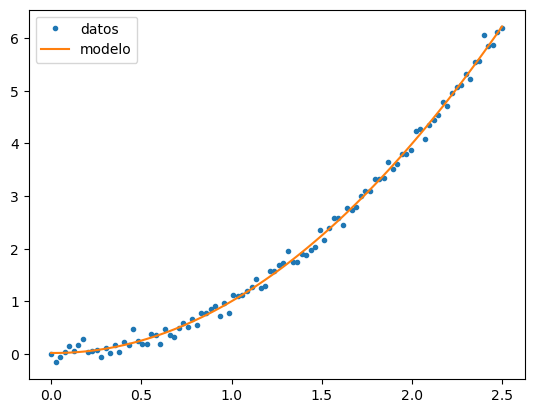

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([
    ('polynomial_transform', PolynomialFeatures(3)),
    ('linear_fit', LinearRegression())
])

pipe.fit(X.reshape(-1, 1), y)

predictions = pipe.predict(X.reshape(-1, 1))
plt.plot(X, y, '.', label='datos')
plt.plot(X, predictions, label='modelo')
plt.legend()


¬øEsto generaliza?

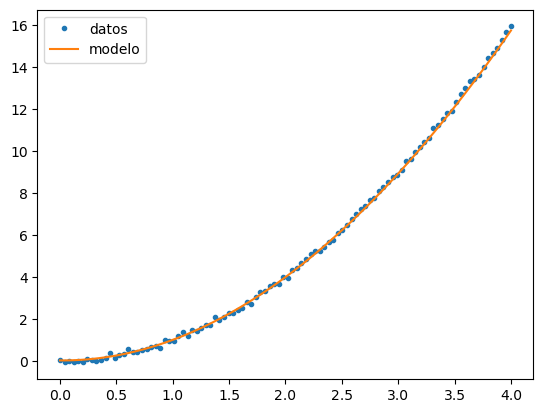

In [ ]:
X = np.linspace(0, 4, 100)
y = X**exp + np.random.randn(X.shape[0])/10
predictions = pipe.predict(X.reshape(-1, 1))
plt.plot(X, y, '.', label='datos')
plt.plot(X, predictions, label='modelo')
plt.legend()